In [44]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt

In [118]:
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 9


In [71]:
gpu='''L=26, es=3
Using cuda
T=53.2229s
L=24, es=14
Using cuda
T=66.1200s
L=22, es=56
Using cuda
T=68.3929s
L=20, es=225
Using cuda
T=62.0299s
L=18, es=900
Using cuda
T=62.2996s
L=16, es=3600
Using cuda
T=67.7027s
L=14, es=14400
Using cuda
T=110.0318s
L=12, es=57600
Using cuda
T=288.5846s'''

In [56]:
cpu='''n=16, ppn=4, L=26, es=64
T=1306.2273s
n=16, ppn=4, L=24, es=64
T=252.3793s
n=16, ppn=4, L=22, es=64
T=62.5647s
n=16, ppn=4, L=20, es=64
T=12.5439s
n=16, ppn=4, L=18, es=64
T=3.7268s
n=16, ppn=4, L=16, es=64
T=1.9896s
n=16, ppn=4, L=14, es=64
T=1.5171s
n=16, ppn=4, L=12, es=64
T=1.4968s
n=32, ppn=2, L=26, es=64
T=1159.9266s
n=32, ppn=2, L=24, es=64
T=261.5928s
n=32, ppn=2, L=22, es=64
T=64.5332s
n=32, ppn=2, L=20, es=64
T=13.2190s
n=32, ppn=2, L=18, es=64
T=3.5315s
n=32, ppn=2, L=16, es=64
T=1.9042s
n=32, ppn=2, L=14, es=64
T=1.4659s
n=32, ppn=2, L=12, es=64
T=1.5511s
n=64, ppn=1, L=24, es=64
T=295.4571s
n=64, ppn=1, L=22, es=64
T=73.9363s
n=64, ppn=1, L=20, es=64
T=13.8012s
n=64, ppn=1, L=18, es=64
T=4.0213s
n=64, ppn=1, L=16, es=64
T=2.3665s
n=64, ppn=1, L=14, es=64
T=2.0466s
n=64, ppn=1, L=12, es=64
T=1.9254s'''

In [72]:
df_gpu=pd.DataFrame(columns=['L','es','T'],)
for idx,line in enumerate(gpu.split('\n')):
    if idx%3==0:
        rs=re.search(r"L=(\d+), es=(\d+)", line)
        df_gpu.loc[idx//3,'L']=int(rs.group(1))
        df_gpu.loc[idx//3,'es']=int(rs.group(2))
    if idx%3==2:
        df_gpu.loc[idx//3,'T']=float(line.split('=')[1][:-1])

In [73]:
df_cpu=pd.DataFrame(columns=['n','ppn','L','es','T'])
for idx,line in enumerate(cpu.split('\n')):
    if idx%2==0:
        rs=re.search(r"n=(\d+), ppn=(\d+), L=(\d+), es=(\d+)", line)
        df_cpu.loc[idx//2,'n']=int(rs.group(1))
        df_cpu.loc[idx//2,'ppn']=int(rs.group(2))
        df_cpu.loc[idx//2,'L']=int(rs.group(3))
        df_cpu.loc[idx//2,'es']=int(rs.group(4))
    if idx%2==1:
        df_cpu.loc[idx//2,'T']=float(line.split('=')[1][:-1])

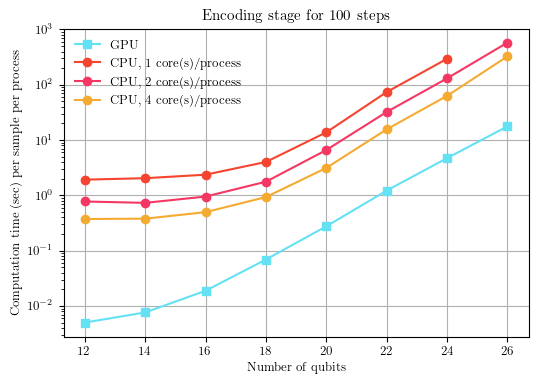

In [121]:
fig,ax=plt.subplots(figsize=(6,4))
ax.plot(df_gpu['L'],df_gpu['T']/df_gpu['es'],'s-',label='GPU',color='#65E1F4')
color_list=['#F5442F','#F53763','#F5AA31']
for ppn,color in zip([1,2,4],color_list):
    df_cpu_ppn=df_cpu[df_cpu['ppn']==ppn]
    ax.plot(df_cpu_ppn['L'],df_cpu_ppn['T']/df_cpu_ppn['es']*df_cpu_ppn['n'],'o-',label=f'CPU, {ppn} core(s)/process',color=color)
ax.legend(frameon=False)
ax.set_yscale('log')
ax.set_xlabel('Number of qubits')
ax.set_ylabel('Computation time (sec) per sample per process')
ax.grid('on')
ax.set_title('Encoding stage for 100 steps')
fig.savefig('benchmark.pdf',bbox_inches='tight')